In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')
import os

import matplotlib.pyplot as plt
import sklearn
import sys
import tensorflow as tf
import time
import random
import pathlib
from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)


training_path = pathlib.Path('./lol_data_2/training')
validation_path = pathlib.Path('./lol_data_2/valid')
test_path = pathlib.Path('./lol_data_2/test')

train_image_paths = list(training_path.glob('*/*'))  
valid_image_paths = list(validation_path.glob('*/*'))  
test_image_paths = list(test_path.glob('*/'))  

train_image_paths = [str(path) for path in train_image_paths]
valid_image_paths = [str(path) for path in valid_image_paths]
test_image_paths = [str(path) for path in test_image_paths]

random.shuffle(train_image_paths)
random.shuffle(valid_image_paths)
random.shuffle(test_image_paths)

train_image_count = len(train_image_paths)
valid_image_count = len(valid_image_paths)
test_image_count = len(test_image_paths)

print("Training Images -> ", train_image_count)
print("Validation Images -> ", valid_image_count)
print("Test Images -> ", test_image_count)

2.1.0
sys.version_info(major=3, minor=6, micro=8, releaselevel='final', serial=0)
numpy 1.18.1
pandas 0.23.3
sklearn 0.21.3
tensorflow 2.1.0
tensorflow_core.keras 2.2.4-tf
Training Images ->  48089
Validation Images ->  13840
Test Images ->  160


In [8]:
with tf.device('/gpu:0'):

    gpu_a = tf.random.normal([10000, 1000])

    gpu_b = tf.random.normal([1000, 2000])

    print(gpu_a.device, gpu_b.device)



/job:localhost/replica:0/task:0/device:GPU:0 /job:localhost/replica:0/task:0/device:GPU:0


In [9]:
train_image_paths[:5]

["lol_data_2\\training\\Knight's_Vow_item\\Knight's_Vow_271.png",
 "lol_data_2\\training\\Mikael's_Crucible_item\\Mikael's_Crucible_136.png",
 "lol_data_2\\training\\Luden's_Echo_item\\Luden's_Echo_2041.png",
 'lol_data_2\\training\\Serrated_Dirk_item\\Serrated_Dirk_258.png',
 'lol_data_2\\training\\Glacial_Shroud_item\\Glacial_Shroud_203.png']

In [10]:
valid_image_paths[:5]

['lol_data_2\\valid\\Control_Ward_item\\Control_Ward_346.png',
 'lol_data_2\\valid\\The_Bloodthirster_item\\The_Bloodthirster_286.png',
 'lol_data_2\\valid\\Catalyst_of_Aeons_item\\Catalyst_of_Aeons_323.png',
 "lol_data_2\\valid\\Banshee's_Veil_item\\Banshee's_Veil_313.png",
 'lol_data_2\\valid\\Health_Potion_item\\Health_Potion_356.png']

In [11]:
test_image_paths[:5]

['lol_data_2\\test\\Sapphire_Crystal_item.png',
 "lol_data_2\\test\\Stalker's_Blade_item.png",
 "lol_data_2\\test\\Spectre's_Cowl_item.png",
 'lol_data_2\\test\\Magus_item.png',
 'lol_data_2\\test\\Health_Potion_item.png']

In [12]:
label_names = sorted(item.name for item in training_path.glob('*/') if item.is_dir())
label_names

['Abyssal_Mask_item',
 'Adaptive_Helm_item',
 'Aegis_of_the_Legion_item',
 'Aether_Wisp_item',
 'Amplifying_Tome_item',
 "Archangel's_Staff_item",
 'Ardent_Censer_item',
 "Athene's_Unholy_Grail_item",
 'B._F._Sword_item',
 "Bami's_Cinder_item",
 "Banshee's_Veil_item",
 "Berserker's_Greaves_item",
 'Bilgewater_Cutlass_item',
 'Blade_of_the_Ruined_King_item',
 'Blasting_Wand_item',
 'Bloodrazor_item',
 'Boots_of_Mobility_item',
 'Boots_of_Speed_item',
 'Bramble_Vest_item',
 'Catalyst_of_Aeons_item',
 "Caulfield's_Warhammer_item",
 'Chain_Vest_item',
 'Chalice_of_Harmony_item',
 'Cloak_of_Agility_item',
 'Cloth_Armor_item',
 'Control_Ward_item',
 'Corrupting_Potion_item',
 'Crystalline_Bracer_item',
 'Cull_item',
 'Dagger_item',
 "Dead_Man's_Plate_item",
 "Death's_Dance_item",
 "Doran's_Blade_item",
 "Doran's_Ring_item",
 "Doran's_Shield_item",
 'Duskblade_of_Draktharr_item',
 'Edge_of_Night_item',
 'Elixir_of_Iron_item',
 'Elixir_of_Sorcery_item',
 'Elixir_of_Wrath_item',
 'Essence_Reave

In [13]:
training_image_labels = [pathlib.Path(path).parent.name for path in train_image_paths]
for image, label in zip(train_image_paths[:5], training_image_labels[:5]):
    print(image, ' --->  ', label)

lol_data_2\training\Knight's_Vow_item\Knight's_Vow_271.png  --->   Knight's_Vow_item
lol_data_2\training\Mikael's_Crucible_item\Mikael's_Crucible_136.png  --->   Mikael's_Crucible_item
lol_data_2\training\Luden's_Echo_item\Luden's_Echo_2041.png  --->   Luden's_Echo_item
lol_data_2\training\Serrated_Dirk_item\Serrated_Dirk_258.png  --->   Serrated_Dirk_item
lol_data_2\training\Glacial_Shroud_item\Glacial_Shroud_203.png  --->   Glacial_Shroud_item


In [14]:
train_labels_info = []
for image_path, label in zip(train_image_paths, training_image_labels):
    train_labels_info.append((image_path, label))

In [15]:
import pprint
pprint.pprint(train_labels_info[:5])

[("lol_data_2\\training\\Knight's_Vow_item\\Knight's_Vow_271.png",
  "Knight's_Vow_item"),
 ("lol_data_2\\training\\Mikael's_Crucible_item\\Mikael's_Crucible_136.png",
  "Mikael's_Crucible_item"),
 ("lol_data_2\\training\\Luden's_Echo_item\\Luden's_Echo_2041.png",
  "Luden's_Echo_item"),
 ('lol_data_2\\training\\Serrated_Dirk_item\\Serrated_Dirk_258.png',
  'Serrated_Dirk_item'),
 ('lol_data_2\\training\\Glacial_Shroud_item\\Glacial_Shroud_203.png',
  'Glacial_Shroud_item')]


In [16]:
valid_image_labels = [pathlib.Path(path).parent.name for path in valid_image_paths]
for image, label in zip(valid_image_paths[:5], valid_image_labels[:5]):
    print(image, ' --->  ', label)

lol_data_2\valid\Control_Ward_item\Control_Ward_346.png  --->   Control_Ward_item
lol_data_2\valid\The_Bloodthirster_item\The_Bloodthirster_286.png  --->   The_Bloodthirster_item
lol_data_2\valid\Catalyst_of_Aeons_item\Catalyst_of_Aeons_323.png  --->   Catalyst_of_Aeons_item
lol_data_2\valid\Banshee's_Veil_item\Banshee's_Veil_313.png  --->   Banshee's_Veil_item
lol_data_2\valid\Health_Potion_item\Health_Potion_356.png  --->   Health_Potion_item


In [17]:
valid_labels_info = []
for image_path, label in zip(valid_image_paths, valid_image_labels):
    valid_labels_info.append((image_path, label))

In [18]:
pprint.pprint(valid_labels_info[:5])

[('lol_data_2\\valid\\Control_Ward_item\\Control_Ward_346.png',
  'Control_Ward_item'),
 ('lol_data_2\\valid\\The_Bloodthirster_item\\The_Bloodthirster_286.png',
  'The_Bloodthirster_item'),
 ('lol_data_2\\valid\\Catalyst_of_Aeons_item\\Catalyst_of_Aeons_323.png',
  'Catalyst_of_Aeons_item'),
 ("lol_data_2\\valid\\Banshee's_Veil_item\\Banshee's_Veil_313.png",
  "Banshee's_Veil_item"),
 ('lol_data_2\\valid\\Health_Potion_item\\Health_Potion_356.png',
  'Health_Potion_item')]


In [19]:
test_image_labels = [path.split('\\')[2].split('.')[0] for path in test_image_paths]
for image, label in zip(test_image_paths[:5], test_image_labels[:5]):
    print(image, ' --->  ', label)

lol_data_2\test\Sapphire_Crystal_item.png  --->   Sapphire_Crystal_item
lol_data_2\test\Stalker's_Blade_item.png  --->   Stalker's_Blade_item
lol_data_2\test\Spectre's_Cowl_item.png  --->   Spectre's_Cowl_item
lol_data_2\test\Magus_item.png  --->   Magus_item
lol_data_2\test\Health_Potion_item.png  --->   Health_Potion_item


In [20]:
test_labels_info = []
for image_path, label in zip(test_image_paths, test_image_labels):
    test_labels_info.append((image_path, label))

In [21]:
train_df = pd.DataFrame(train_labels_info)
valid_df = pd.DataFrame(valid_labels_info)
test_df = pd.DataFrame(test_labels_info)

train_df.columns = valid_df.columns =test_df.columns = ['filepath', 'class']

print(train_df.head())
print(valid_df.head())
print(test_df.head())

filepath                   class
0  lol_data_2\training\Knight's_Vow_item\Knight's...       Knight's_Vow_item
1  lol_data_2\training\Mikael's_Crucible_item\Mik...  Mikael's_Crucible_item
2  lol_data_2\training\Luden's_Echo_item\Luden's_...       Luden's_Echo_item
3  lol_data_2\training\Serrated_Dirk_item\Serrate...      Serrated_Dirk_item
4  lol_data_2\training\Glacial_Shroud_item\Glacia...     Glacial_Shroud_item
                                            filepath                   class
0  lol_data_2\valid\Control_Ward_item\Control_War...       Control_Ward_item
1  lol_data_2\valid\The_Bloodthirster_item\The_Bl...  The_Bloodthirster_item
2  lol_data_2\valid\Catalyst_of_Aeons_item\Cataly...  Catalyst_of_Aeons_item
3  lol_data_2\valid\Banshee's_Veil_item\Banshee's...     Banshee's_Veil_item
4  lol_data_2\valid\Health_Potion_item\Health_Pot...      Health_Potion_item
                                    filepath                  class
0  lol_data_2\test\Sapphire_Crystal_item.png  Sapphi

In [22]:
height = 64
width = 64
channels = 3
batch_size = 128
num_classes = 160

train_datagen = keras.preprocessing.image.ImageDataGenerator(
    #像素值 都除以255
    rescale = 1./255,
    # 图片随机旋转 (5度以内)
    rotation_range = 20,
    # 图片左右位移  20%限度以内
    width_shift_range = 0.2,
    # 图片上下位移  20%限度以内
    height_shift_range = 0.2,
    # 图像剪切强度
    shear_range = 0.2,
    # 图像缩放强度
    zoom_range = 0.2,
    # 是否水平翻转
    horizontal_flip = False,
    # 放大缩小吼， 像素填充方式
    fill_mode = 'nearest',
)

train_generator = train_datagen.flow_from_dataframe(train_df, directory = './',
                                                    x_col = 'filepath',
                                                    y_col = 'class',
                                                    classes = label_names,
                                                    target_size = (height, width),
                                                    batch_size = batch_size,
                                                    seed = 2,
                                                    shuffle = True,
                                                    class_mode = "categorical")

valid_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
)
valid_generator = valid_datagen.flow_from_dataframe(valid_df, directory = './',
                                                    x_col = 'filepath',
                                                    y_col = 'class',
                                                    classes = label_names,
                                                    target_size = (height, width),
                                                    batch_size = batch_size,
                                                    seed = 24,
                                                    shuffle = True,
                                                    class_mode = "categorical")

test_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
)
test_generator = test_datagen.flow_from_dataframe(test_df, directory = './',
                                                    x_col = 'filepath',
                                                    y_col = 'class',
                                                    classes = label_names,
                                                    target_size = (height, width),
                                                    batch_size = batch_size,
                                                    seed = 8,
                                                    shuffle = True,
                                                    class_mode = "categorical")

Found 48089 validated image filenames belonging to 160 classes.
Found 13840 validated image filenames belonging to 160 classes.
Found 157 validated image filenames belonging to 160 classes.


In [23]:
train_num = train_generator.samples
valid_num = valid_generator.samples
test_num = test_generator.samples

print("Training Generator Sample -> ", train_num)
print("Validation Generator Sample -> ", valid_num)
print("Test Generator Sample -> ", test_num)

Training Generator Sample ->  48089
Validation Generator Sample ->  13840
Test Generator Sample ->  157


In [24]:
for i in range(2):
    x, y = train_generator.next()
    print(x.shape, y.shape)
    print(y)

(128, 64, 64, 3) (128, 160)
[[0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(128, 64, 64, 3) (128, 160)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [25]:
model = keras.models.Sequential([
    
    keras.layers.Conv2D(filters=16, kernel_size = 3, padding='same',
                       activation = 'selu', input_shape = [width, height, channels]),
    keras.layers.Conv2D(filters=16, kernel_size = 3, 
                        padding='same', activation = 'selu'),
    keras.layers.MaxPool2D(pool_size=2),
    
    keras.layers.Conv2D(filters=32, kernel_size = 3, 
                        padding='same', activation = 'selu'),
    keras.layers.Conv2D(filters=32, kernel_size = 3, 
                        padding='same', activation = 'selu'),
    keras.layers.MaxPool2D(pool_size=2),
    
    keras.layers.Conv2D(filters=64, kernel_size = 3, padding='same',
                       activation = 'selu', input_shape = [width, height, channels]),
    keras.layers.Conv2D(filters=64, kernel_size = 3, 
                        padding='same', activation = 'selu'),
    keras.layers.MaxPool2D(pool_size=2),
    
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation = 'selu'),
    keras.layers.AlphaDropout(rate=0.5),
    
    keras.layers.Dense(num_classes, activation = 'softmax')
])

model.compile(loss="categorical_crossentropy",
             optimizer = "adam", metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 16)        448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 16)        2320      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        1

In [26]:
logdir = './lol-callbacks'
if not os.path.exists(logdir):
    os.mkdir(logdir)

output_model_file = os.path.join(logdir, "item_detection_model.h5")

# callbacks = [
#     keras.callbacks.ModelCheckpoint(output_model_file, monitor='val_loss', mode='min', verbose=0, save_best_only=True),
#     keras.callbacks.EarlyStopping(patience=5, min_delta=1e-3)
# ]

In [27]:
epochs = 20
#因为数据是generator 产生的 所以不能用fit函数
history = model.fit_generator(train_generator, steps_per_epoch=train_num // batch_size,
                             epochs=epochs, validation_data=valid_generator,
                             validation_steps=valid_num//batch_size,
                             callbacks = [
    keras.callbacks.ModelCheckpoint(output_model_file, monitor='val_loss', mode='min', verbose=0, save_best_only=True)
])

W0217 13:22:16.629734  7348 deprecation.py:323] From <ipython-input-27-d90a6ad36f1f>:7: Model.fit_generator (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
Please use Model.fit, which supports generators.
W0217 13:22:16.837217  7348 data_adapter.py:1091] sample_weight modes were coerced from
  ...
    to  
  ['...']
W0217 13:22:17.081280  7348 data_adapter.py:1091] sample_weight modes were coerced from
  ...
    to  
  ['...']
Train for 375 steps, validate for 108 steps
Epoch 1/20
375/375 [==============================] - 145s 387ms/step - loss: 1.5046 - accuracy: 0.6301 - val_loss: 3.9514e-05 - val_accuracy: 1.0000
Epoch 2/20
375/375 [==============================] - 81s 215ms/step - loss: 0.2460 - accuracy: 0.9249 - val_loss: 0.0114 - val_accuracy: 0.9942
Epoch 3/20
375/375 [==============================] - 82s 219ms/step - loss: 0.1496 - accuracy: 0.9524 - val_loss: 5.5189e-09 - val_accuracy: 1.0000


In [28]:
def plot_learning_curves(history, label, epochs, min_value, max_value):
    data = {}
    data[label] = history.history[label]
    data['val_'+label] = history.history['val_' + label]
    
    pd.DataFrame(data).plot(figsize = (8,5))
    plt.grid(True)
    plt.axis([0, epochs, min_value, max_value])
    plt.show()

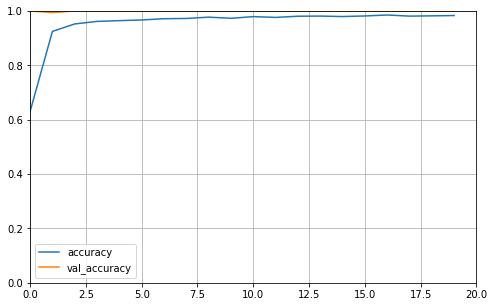

In [29]:
plot_learning_curves(history, 'accuracy', epochs, 0, 1)

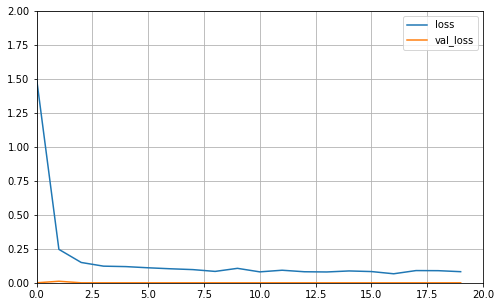

In [30]:
plot_learning_curves(history, 'loss', epochs, 0, 2)

In [31]:
import tensorflow as tf
def load_and_preprocess_single_img(path):
    # read the img through file path
    image = tf.io.read_file(path)  
    image = tf.image.decode_jpeg(image, channels=3)
    # 原始图片大小为(128, 128, 3)，重设为(64, 64)
    image = tf.image.resize(image, [64, 64])  
    image = tf.cast(image, tf.float32) / 255.0  # 归一化到[0,1]范围
    image = np.expand_dims(image, axis = 0) # since you have batch_size, so you need to expand your image
    return image

In [32]:
def evaluate_single_pic(path, show=False):
    
    if show:
        import matplotlib.image as mpimg
        plt.imshow(mpimg.imread(path))
    image = load_and_preprocess_single_img(path)
    predict_result = model.predict(image)
    print("This is", label_names[np.argmax(predict_result, axis=1)[0]])

This is Locket_of_the_Iron_Solari_item


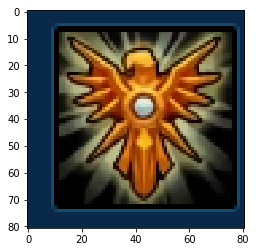

In [33]:
test_pic_path = "./lol_data_2/test2/15.png"
evaluate_single_pic(test_pic_path, True)

This is nothing_item


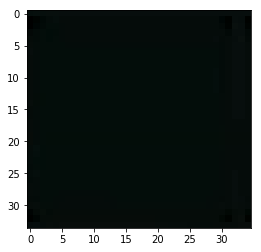

In [35]:
test_pic_path2 = "./lol_data_2/test2/21.png"
evaluate_single_pic(test_pic_path2, True)

In [36]:
test_accuracy = model.evaluate(test_generator)
print(test_accuracy)

W0217 14:00:29.248995  7348 data_adapter.py:1091] sample_weight modes were coerced from
  ...
    to  
  ['...']
2/2 [==============================] - 0s 128ms/step - loss: 0.0000e+00 - accuracy: 1.0000
[0.0, 1.0]
